In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import *

df=pd.read_csv("../data-master/snsdata.csv")

df.head()


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [59]:
features = ["basketball", "football",
       "soccer", "softball", "volleyball", "swimming", "cheerleading",
       "baseball", "tennis", "sports", "cute", "sex", "sexy", "hot", "kissed",
       "dance", "band", "marching", "music", "rock", "god", "church", "jesus",
       "bible", "hair", "dress", "blonde", "mall", "shopping", "clothes",
       "hollister", "abercrombie", "die", "death", "drunk", "drugs"]

In [60]:
#df[features].plot.scatter(0, 4)
k = 5
X = df.iloc[:,4:]
features=X.columns
X=np.log10(X.values.astype("float")+1)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
#X

In [61]:
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [62]:
df["cluster"] = y_pred
df.head(10)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,4
5,2006,F,NaN,142,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,3
6,2006,F,18.930,72,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,3
7,2006,M,18.322,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,2006,F,19.055,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,2006,F,18.708,39,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [63]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)


In [64]:
distances = np.zeros([len(df)])

for i in range(k):
    points = X[y_pred == i]
    centroid = kmeans.cluster_centers_[[i]]
    distances[y_pred == i] = metrics.euclidean_distances(points, centroid).squeeze()
df["distance"] = distances
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster,distance
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.701054
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.389174
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,4.379697
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2.613106
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,4,7.478708


Text(0.5,1,'Histogram of distances of each point to its centroid')

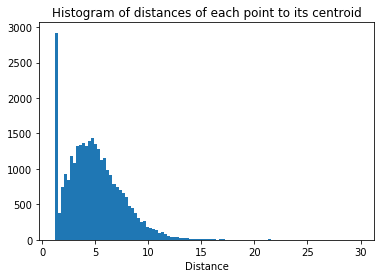

In [65]:
plt.hist(df.distance, bins = 100);
plt.xlabel("Distance")
plt.title("Histogram of distances of each point to its centroid")

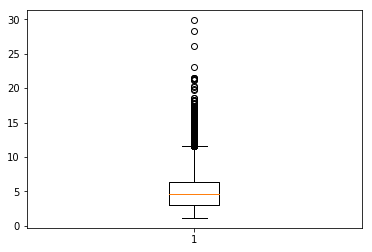

In [66]:
plt.boxplot(df.distance);

In [67]:
def outlier(y):
    q1, q3 = np.percentile(y, [25, 75])
    iqr = q3 - q1
    upper_whisker = min(np.max(y), q3 + 1.5 * iqr)
    lower_whisker = max(np.min(y), q1 - 1.5 * iqr)
    print(q1, q3, iqr, lower_whisker, upper_whisker)
    return (y > upper_whisker) | (y<lower_whisker)

In [68]:
df["outlier"] = outlier(df.distance)
df.head(10)

3.0248575943089255 6.440575592868614 3.415717998559688 1.1598481148633228 11.564152590708145


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster,distance,outlier
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.701054,False
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,8.389174,False
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,4.379697,False
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2.613106,False
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,4,7.478708,False
5,2006,F,NaN,142,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3,6.121912,False
6,2006,F,18.930,72,0,0,0,0,0,0,...,0,2,0,0,0,0,0,3,7.005689,False
7,2006,M,18.322,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,5.092186,False
8,2006,F,19.055,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.159848,False
9,2006,F,18.708,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.499123,False


In [71]:
df.groupby("cluster").distance.agg(["count", "mean"])

,count,mean
cluster,,
0,5870,7.133406
1,18019,3.480078
2,3885,6.373935
3,807,5.574299
4,1419,9.439011
